<a href="https://colab.research.google.com/github/prakashsurya-840/AAI-521FinalProject/blob/main/Team_Assignment_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install Required Libraries

In [40]:
!pip install opencv-python matplotlib numpy --quiet
import numpy as np


### Unzip Dataset

In [29]:
import zipfile, os

zip_path = "/content/selfie-and-id-dataset.zip"   # uploaded manually
extract_dir = "/content/data/selfie_and_id"

os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_dir)

print("Extracted to:", extract_dir)


Extracted to: /content/data/selfie_and_id


### Load Metadata (Selie_ID.csv)

In [30]:
import pandas as pd
import os

csv_path = os.path.join(extract_dir, "Selie_ID.csv")
df = pd.read_csv(csv_path, sep=";")  # dataset uses semicolon separator

df.head()


,set_id,age,gender,country,ethnicity,device_model,age_printed_1,age_printed_2,1_id_photo_resolution,2_id_photo_resolution,...,4_selfie_photo_extension,5_selfie_photo_extension,6_selfie_photo_extension,7_selfie_photo_extension,8_selfie_photo_extension,9_selfie_photo_extension,10_selfie_photo_extension,11_selfie_photo_extension,12_selfie_photo_extension,13_selfie_photo_extension
0,1,45,FEMALE,Ukraine,European,Samsung M31,16,25,962 x 1000,907 x 1000,...,jpg,jpg,jpg,jpg,jpg,jpg,jpg,jpg,jpg,jpg
1,2,24,MALE,Pakistan,Asian,Infinix note11,18,23,1000 x 750,1000 x 750,...,jpg,jpg,jpg,jpg,jpg,jpg,jpg,jpg,jpg,jpg
2,3,35,MALE,Egypt,Middle Eastern,Infinix note 10,33,34,1000 x 750,1000 x 748,...,jpg,jpg,jpg,jpg,jpg,jpg,jpg,jpg,jpg,jpg
3,4,19,FEMALE,Nigeria,African,Tecno Pop 7,18,18,750 x 1000,1000 x 750,...,jpg,jpg,jpg,jpg,jpg,jpeg,jpg,jpeg,jpg,jpg
4,5,31,FEMALE,South Africa,African,Samsung A05,25,17,1000 x 750,1000 x 750,...,jpg,jpg,jpg,jpg,jpg,jpg,jpg,jpg,jpg,jpg


### Inspect Metadata

In [31]:
print("Shape:", df.shape)
print("\nColumns:", list(df.columns))

df.describe(include="all").T.head(15)


Shape: (10, 38)

Columns: ['set_id', 'age', 'gender', 'country', 'ethnicity', 'device_model', 'age_printed_1', 'age_printed_2', '1_id_photo_resolution', '2_id_photo_resolution', '1_selfie_photo_resolution', '2_selfie_photo_resolution', '3_selfie_photo_resolution', '4_selfie_photo_resolution', '5_selfie_photo_resolution', '6_selfie_photo_resolution', '7_selfie_photo_resolution', '8_selfie_photo_resolution', '9_selfie_photo_resolution', '10_selfie_photo_resolution', '11_selfie_photo_resolution', '12_selfie_photo_resolution', '13_selfie_photo_resolution', '1_id_photo_extension', '2_id_photo_extension', '1_selfie_photo_extension', '2_selfie_photo_extension', '3_selfie_photo_extension', '4_selfie_photo_extension', '5_selfie_photo_extension', '6_selfie_photo_extension', '7_selfie_photo_extension', '8_selfie_photo_extension', '9_selfie_photo_extension', '10_selfie_photo_extension', '11_selfie_photo_extension', '12_selfie_photo_extension', '13_selfie_photo_extension']


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
set_id,10.0,NaN,NaN,NaN,5.5,3.02765,1.0,3.25,5.5,7.75,10.0
age,10.0,NaN,NaN,NaN,27.9,7.936554,19.0,23.25,25.0,31.75,45.0
gender,10,2,FEMALE,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,10,10,Ukraine,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ethnicity,10,4,Asian,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
device_model,10,10,Samsung M31,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_printed_1,10.0,NaN,NaN,NaN,20.6,7.426679,7.0,17.25,19.0,24.25,33.0
age_printed_2,10.0,NaN,NaN,NaN,21.5,7.749552,6.0,18.25,21.0,24.5,34.0
1_id_photo_resolution,10,5,1000 x 750,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2_id_photo_resolution,10,6,1000 x 750,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Explore Dataset Structure

In [32]:
# Count how many folders & files exist
for dirpath, dirnames, filenames in os.walk(extract_dir):
    print(dirpath, "->", len(filenames), "files")
    # stop early so it doesn't print 1000 lines
    if dirpath.count(os.sep) > extract_dir.count(os.sep) + 2:
        break


/content/data/selfie_and_id -> 1 files
/content/data/selfie_and_id/files -> 0 files
/content/data/selfie_and_id/files/9 -> 14 files
/content/data/selfie_and_id/files/4 -> 15 files
/content/data/selfie_and_id/files/10 -> 15 files
/content/data/selfie_and_id/files/3 -> 15 files
/content/data/selfie_and_id/files/2 -> 15 files
/content/data/selfie_and_id/files/1 -> 15 files
/content/data/selfie_and_id/files/8 -> 15 files
/content/data/selfie_and_id/files/5 -> 15 files
/content/data/selfie_and_id/files/7 -> 15 files
/content/data/selfie_and_id/files/6 -> 15 files


### Missing values + basic sanity check

In [33]:
# Quick missing-value check in metadata
missing_counts = df.isna().sum().sort_values(ascending=False)
print("Missing values per column (top 10):")
print(missing_counts.head(10))


Missing values per column (top 10):
set_id                   0
age                      0
gender                   0
country                  0
ethnicity                0
device_model             0
age_printed_1            0
age_printed_2            0
1_id_photo_resolution    0
2_id_photo_resolution    0
dtype: int64


### Build Paths to Selfies

In [34]:
base_img_dir = os.path.join(extract_dir, "files")

def get_selfie_path(row: pd.Series, selfie_idx: int = 1) -> str:
    """
    Build the file path to a selfie image for a given person (row).

    Args:
        row (pd.Series): One row from the Selie_ID dataframe. Must contain
            'set_id' and the '<idx>_selfie_photo_extension' column.
        selfie_idx (int, optional): Which selfie to load (1–13).
            Defaults to 1 (first selfie).

    Returns:
        str: Absolute path to the selfie image on disk, e.g.
            '/content/data/selfie_and_id/files/1/Selfie_1.jpg'
    """
    set_id = row["set_id"]
    ext_col = f"{selfie_idx}_selfie_photo_extension"
    extension = row[ext_col]
    filename = f"Selfie_{selfie_idx}.{extension}"
    return os.path.join(base_img_dir, str(set_id), filename)


# Test:
get_selfie_path(df.iloc[0], selfie_idx=1)


'/content/data/selfie_and_id/files/1/Selfie_1.jpg'

### Show Sample Images (Image Inspection)

Path: /content/data/selfie_and_id/files/1/Selfie_1.jpg
Shape: (1000, 563, 3)


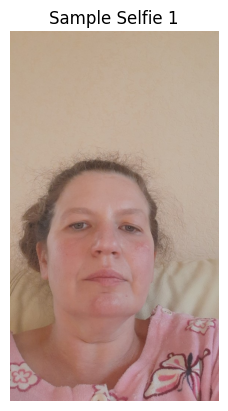

Path: /content/data/selfie_and_id/files/2/Selfie_1.jpg
Shape: (1000, 750, 3)


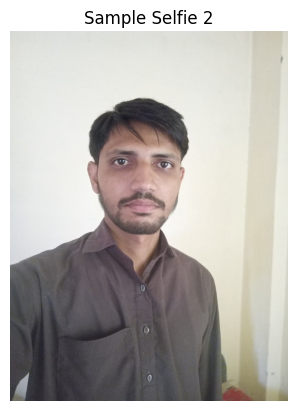

Path: /content/data/selfie_and_id/files/3/Selfie_1.jpg
Shape: (1000, 750, 3)


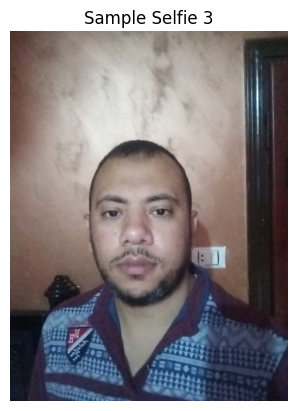

In [35]:
import cv2
import matplotlib.pyplot as plt

def show_image(path: str, title: str | None = None) -> None:
    """
    Load and display a single image using OpenCV + Matplotlib.

    Args:
        path (str): Full path to the image file.
        title (str, optional): Optional title for the plot.
            If None, no title is shown.

    Side effects:
        - Prints path and image shape (H, W, C).
        - Renders the image inline with axes turned off.
    """
    if not os.path.exists(path):
        print("Image not found:", path)
        return

    img = cv2.imread(path)                    # BGR
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    print("Path:", path)
    print("Shape:", img_rgb.shape)

    plt.imshow(img_rgb)
    plt.axis("off")
    if title:
        plt.title(title)
    plt.show()


# Show 3 sample images
for i in range(3):
    p = get_selfie_path(df.iloc[i], selfie_idx=1)
    show_image(p, title=f"Sample Selfie {i+1}")


### Resolution Distribution (EDA)

In [38]:
from collections import Counter
sizes = []

# check first 300 for speed
for i in range(min(300, len(df))):
    p = get_selfie_path(df.iloc[i], selfie_idx=1)
    img = cv2.imread(p)
    if img is not None:
        h, w = img.shape[:2]
        sizes.append((w, h))

Counter(sizes).most_common(10)


[((750, 1000), 5), ((563, 1000), 2), ((1000, 750), 2), ((1000, 1000), 1)]

### Minimal Preprocessing (Resize Helper)

(np.float64(-0.5), np.float64(287.5), np.float64(511.5), np.float64(-0.5))

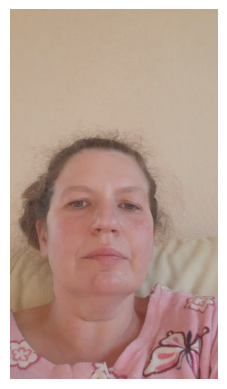

In [41]:
def load_and_resize(path: str, max_size: int = 512) -> np.ndarray | None:
    """
    Load an image from disk and optionally downscale it so that
    the longest side equals `max_size`.

    Args:
        path (str): Full path to the image file.
        max_size (int, optional): Target size for the longest edge in pixels.
            For example, max_size=512 ensures max(H, W) == 512.
            Defaults to 512.

    Returns:
        np.ndarray | None:
            - BGR image array of shape (H, W, 3) after resizing, or
            - None if the image failed to load.
    """
    img = cv2.imread(path)
    if img is None:
        return None

    h, w = img.shape[:2]
    scale = max_size / max(h, w)
    new_w, new_h = int(w * scale), int(h * scale)
    img_resized = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)
    return img_resized


sample = load_and_resize(get_selfie_path(df.iloc[0], 1))
plt.imshow(cv2.cvtColor(sample, cv2.COLOR_BGR2RGB))
plt.axis("off")



### Hand-crafted sketch pipeline functions

In [42]:
def to_grayscale(img_bgr: np.ndarray) -> np.ndarray:
    """
    Convert a BGR color image to a single-channel grayscale image.

    Args:
        img_bgr (np.ndarray): Input color image in BGR format of shape (H, W, 3).

    Returns:
        np.ndarray: Grayscale image of shape (H, W).
    """
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)


def invert(img_gray: np.ndarray) -> np.ndarray:
    """
    Invert a grayscale image (produce its photographic negative).

    Args:
        img_gray (np.ndarray): Grayscale image with pixel values in [0, 255].

    Returns:
        np.ndarray: Inverted grayscale image where each pixel is 255 - value.
    """
    return 255 - img_gray


def blur(img_gray: np.ndarray, kernel: int = 31) -> np.ndarray:
    """
    Apply Gaussian blur to a grayscale image.

    Args:
        img_gray (np.ndarray): Grayscale image.
        kernel (int, optional): Size of the Gaussian kernel (must be odd).
            Larger values produce smoother, softer blur.
            Defaults to 31.

    Returns:
        np.ndarray: Blurred grayscale image.
    """
    return cv2.GaussianBlur(img_gray, (kernel, kernel), 0)


def dodge(base_gray: np.ndarray, blur_img: np.ndarray) -> np.ndarray:
    """
    Perform a 'color dodge' style blend between the base image and a blurred
    version of its inverse, which emphasizes edges and creates a sketch effect.

    Args:
        base_gray (np.ndarray): Original grayscale image.
        blur_img (np.ndarray): Blurred version of the inverted grayscale image.

    Returns:
        np.ndarray: Sketch-like grayscale image.
    """
    return cv2.divide(base_gray, 255 - blur_img, scale=256)


def manual_sketch_from_path(
    path: str,
    blur_kernel: int = 31,
    max_size: int | None = None
) -> tuple[np.ndarray, np.ndarray]:
    """
    Full manual sketch pipeline starting from an image path.

    Steps:
        1. Load BGR image from disk.
        2. Optionally resize to have longest side = max_size.
        3. Convert to grayscale.
        4. Invert grayscale.
        5. Apply Gaussian blur to inverted image.
        6. Blend using dodge() to create a pencil-sketch effect.

    Args:
        path (str): Path to the input selfie image.
        blur_kernel (int, optional): Gaussian kernel size for blur().
            Controls the softness of shading. Defaults to 31.
        max_size (int | None, optional): If provided, the image is resized
            so that max(H, W) == max_size before processing. If None, the
            original resolution is used. Defaults to None.

    Returns:
        tuple[np.ndarray, np.ndarray]:
            - orig_bgr: Original (possibly resized) BGR image.
            - sketch: Final sketch-like grayscale image.
    """
    img_bgr = cv2.imread(path)
    if img_bgr is None:
        raise ValueError(f"Image not found: {path}")

    if max_size is not None:
        h, w = img_bgr.shape[:2]
        scale = max_size / max(h, w)
        new_w, new_h = int(w * scale), int(h * scale)
        img_bgr = cv2.resize(img_bgr, (new_w, new_h), interpolation=cv2.INTER_AREA)

    gray = to_grayscale(img_bgr)
    inv = invert(gray)
    blur_img = blur(inv, blur_kernel)
    sketch = dodge(gray, blur_img)
    return img_bgr, sketch



### Visualize Original vs Sketch

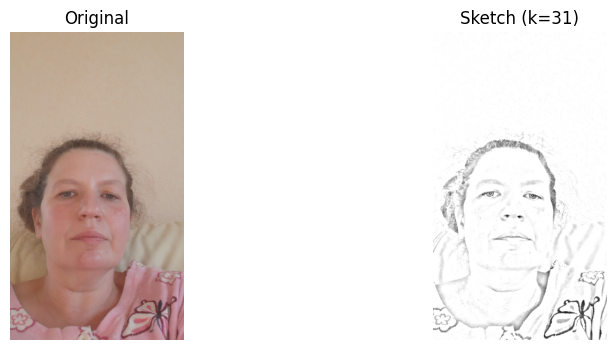

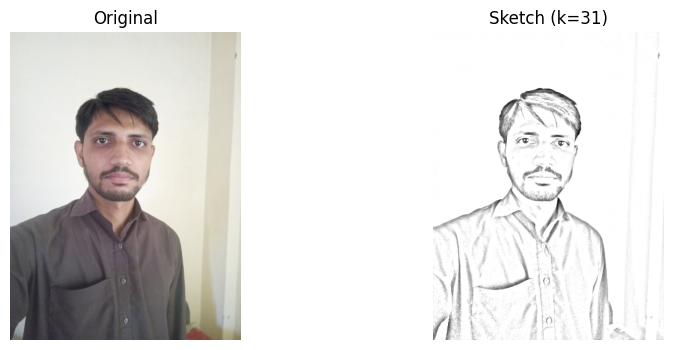

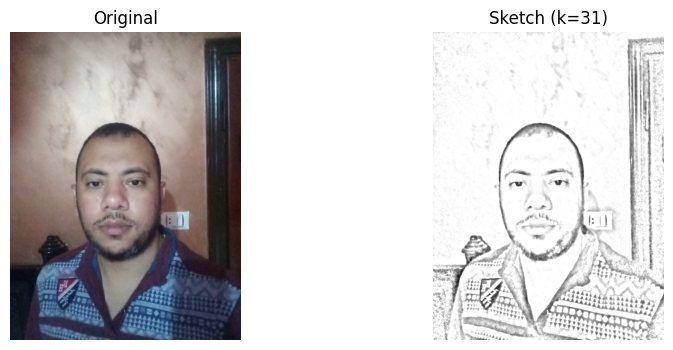

In [43]:
def show_original_and_sketch(path: str, blur_kernel: int = 31, max_size: int | None = 512) -> None:
    """
    Convenience helper to visualize the original selfie and the
    corresponding manual pencil sketch side by side.

    Args:
        path (str): Path to the selfie image on disk.
        blur_kernel (int, optional): Kernel size passed to manual_sketch_from_path().
            Controls edge softness. Defaults to 31.
        max_size (int | None, optional): Optional resize limit for display.
            Passed through to manual_sketch_from_path(). Defaults to 512.

    Side effects:
        - Displays a matplotlib figure with two subplots:
          (left) Original color image, (right) grayscale sketch.
    """
    orig_bgr, sketch = manual_sketch_from_path(path, blur_kernel=blur_kernel, max_size=max_size)
    orig_rgb = cv2.cvtColor(orig_bgr, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(orig_rgb)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(sketch, cmap="gray")
    plt.title(f"Sketch (k={blur_kernel})")
    plt.axis("off")

    plt.show()


# Try on first 3 samples
for i in range(3):
    p = get_selfie_path(df.iloc[i], 1)
    show_original_and_sketch(p)


### Save Sketch Outputs

In [44]:
output_dir = "/content/outputs/handCrafted"
os.makedirs(output_dir, exist_ok=True)

for i in range(10):
    p = get_selfie_path(df.iloc[i], 1)
    _, sketch = manual_sketch_from_path(p)
    out_path = os.path.join(output_dir, f"set_{df.iloc[i]['set_id']}_selfie1_sketch.png")
    cv2.imwrite(out_path, sketch)
    print("Saved:", out_path)


Saved: /content/outputs/handCrafted/set_1_selfie1_sketch.png
Saved: /content/outputs/handCrafted/set_2_selfie1_sketch.png
Saved: /content/outputs/handCrafted/set_3_selfie1_sketch.png
Saved: /content/outputs/handCrafted/set_4_selfie1_sketch.png
Saved: /content/outputs/handCrafted/set_5_selfie1_sketch.png
Saved: /content/outputs/handCrafted/set_6_selfie1_sketch.png
Saved: /content/outputs/handCrafted/set_7_selfie1_sketch.png
Saved: /content/outputs/handCrafted/set_8_selfie1_sketch.png
Saved: /content/outputs/handCrafted/set_9_selfie1_sketch.png
Saved: /content/outputs/handCrafted/set_10_selfie1_sketch.png


### Generate PDF

In [45]:
!apt-get update
!apt-get install texlive-xetex texlive-fonts-recommended texlive-latex-extra

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 129 kB in 1s (105 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sou

In [46]:
%shell jupyter nbconvert --to pdf 'Team_Assignment_7_1.ipynb'

[NbConvertApp] Converting notebook Team_Assignment_7_1.ipynb to pdf
[NbConvertApp] Support files will be in Team_Assignment_7_1_files/
[NbConvertApp] Making directory ./Team_Assignment_7_1_files
[NbConvertApp] Writing 89221 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 929005 bytes to Team_Assignment_7_1.pdf
